## ZAILY LOPEZ
Dataset: https://www.kaggle.com/jessemostipak/hotel-booking-demand

### Context
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

### Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

### Acknowledgements
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

### Business Question: 
Can we predict when a customer is going to cancell a reservation?

#### Data Set: 
hotel_bookings.csv

### About this file: 
This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.

#### Columns
hotel: (H1 = Resort Hotel or H2 = City Hotel)

is_canceled: Value indicating if the booking was canceled (1) or not (0)

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year: Year of arrival date

arrival_date_month: Month of arrival date

arrival_date_week_number: Week number of year for arrival date

arrival_date_day_of_month: Day of arrival date

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults: Number of adults

children: Number of children

babies: Number of babies

meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – 

Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guestValue indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the 

reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of 

designation for anonymity reasons.

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the 

moment of check-in or cancellation

deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 

No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit 
was made with a value under the total cost of stay.

agent: ID of the travel agency that made the booking

company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of 
designation for anonymity reasons

days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type: Type of booking, assuming one of four categories:
        Contract - when the booking has an allotment or other type of contract associated to it; 
        Group – when the booking is associated to a group; 
        Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
        Transient-party – when the booking is transient, but is associated to at least other transient booking

adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces: Number of car parking spaces required by the customer

total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; 

Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the 

ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Final Proyect 

## Contents
- [1. Libraries](#lib) 
- [2. Cleaning and Pre-processing](#cleaning)
- [3. Exploratory Data Aalysis (EDA)](#eda)
- [4. Data collection, pre-processing and feature engineering](#datacol)
- [5. Predictive Modeling and Evaluation (the whole process)](#predmodel)
- [6. Model selection](#modelsel)
    - [6.1 Model 1 - RFC](#model1)
    - [6.2 Model 2 - SVM](#model2)    
    - [6.3 Model 3 - Neural Network](#model3)  
    - [6.4 Model 4 - Gradient Boosting](#model4)  
- [7. Cross validation](#crossval)



<a name="lib"></a>
### 1. Libraries

In [1]:
#Imports from Module 3 
import math
import seaborn as sns 
%matplotlib inline
import numpy as np
import pandas as pd


#Imports from Module 3 
#imports 
#numpy, pandas, scipy, math, matplotlib
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVR, SVC
from sklearn import svm 
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler, LabelEncoder


#model metrics 
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#GradientBoostingClassifier 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from math import sqrt

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<a name="cleaning"></a>
### 2. Cleaning and Pre-processing

In [2]:
#ds = pd.io.parsers.read_csv("default of credit card clients.csv")
raw = pd.read_csv('hotel_bookings.csv')
raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,CheckOut,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,CheckOut,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,CheckOut,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,CheckOut,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,CheckOut,7/3/2015


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

<a name="eda"></a>
## 3. Exploratory Data Aalysis (EDA)

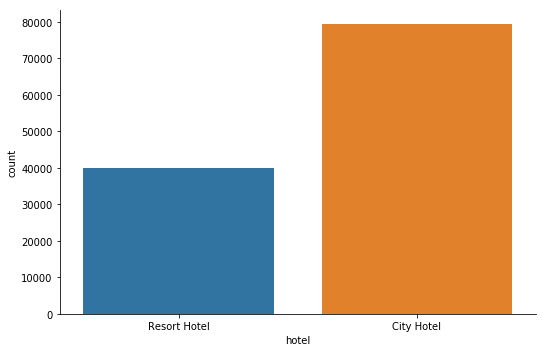

In [4]:
#Graphic to Type of Hotel reservation
h = sns.catplot('hotel', data=raw, kind='count', aspect=1.5)

##Majority of the reservation are been done in City Hotel (almost double). 

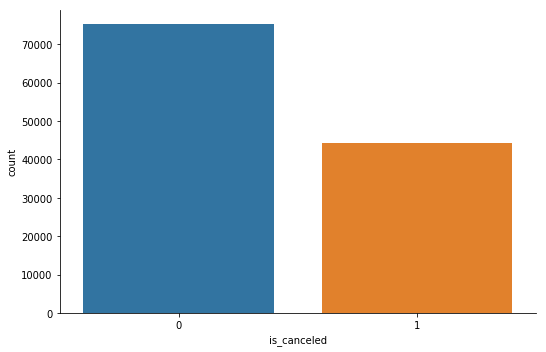

In [5]:
#Graphic cancellation of reservation
#is_canceledValue indicating if the booking was canceled (1) or not (0)
h = sns.catplot('is_canceled', data=raw, kind='count', aspect=1.5)

#Almost half of the reservations are been cancelled

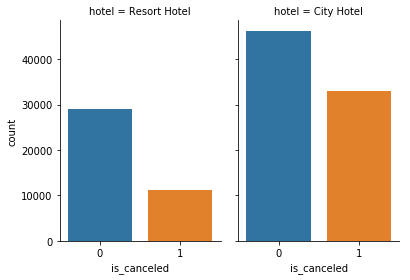

In [6]:
#Graphic cancellation of reservation per type of hotel city / resort 
g = sns.catplot(x='is_canceled', col='hotel',
                data=raw, kind='count',
                height=4, aspect=.7);


## Very high amount of cancelation are for City Hotel. 

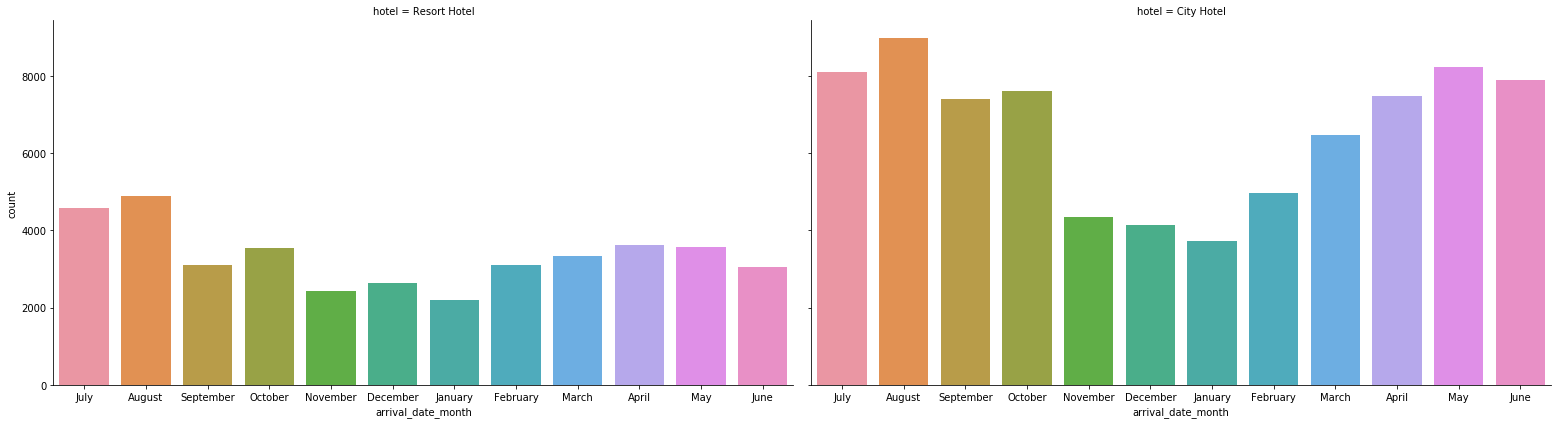

In [7]:
##Months reservations for the Resort Hotel and City Hotel
g = sns.catplot(x='arrival_date_month', col='hotel',
                data=raw, kind='count', height=6, aspect=1.8)
              
plt.show()





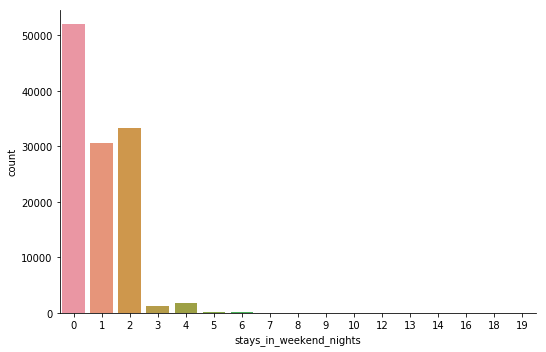

In [8]:
#stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#Graphic 
siweekendn = sns.catplot('stays_in_weekend_nights', data=raw, kind='count', aspect=1.5)

#Reservations done during the weekend majority are for 0 days or 2days or 1day. 

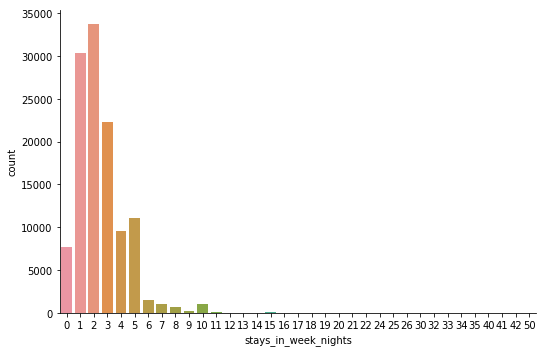

In [9]:
#stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#Graphic 
siweekn = sns.catplot('stays_in_week_nights', data=raw, kind='count', aspect=1.5)

#Majority of the reservations done during the week are for 2 or 1 night. 

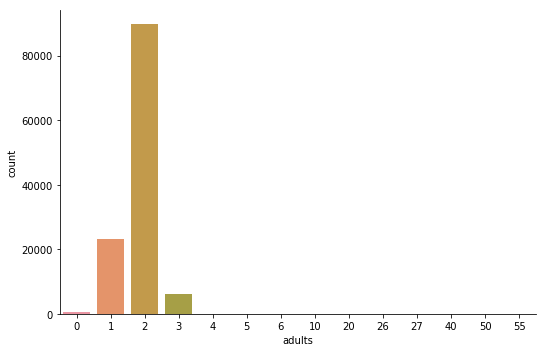

In [10]:
#Quantity of adults per reservation
#Graphic 
adult = sns.catplot('adults', data=raw, kind='count', aspect=1.5)

#Majority of the reservations are for 2 or 1 adult. 

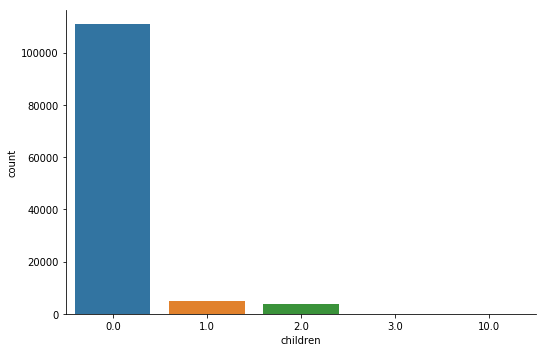

In [11]:
#Quantity of childers per reservation
#Graphic 
adult = sns.catplot('children', data=raw, kind='count', aspect=1.5)

#Majority of the reservations are 0 children, less than 10000 reservations includes a childer or 2 children. 

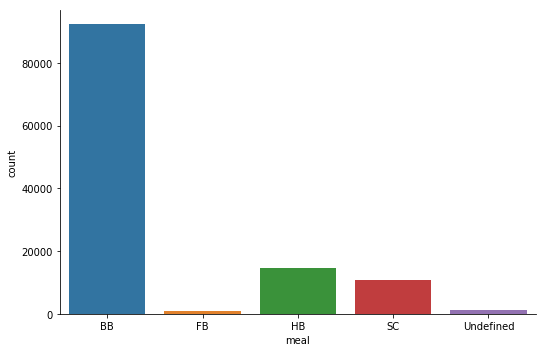

In [12]:
#Type of meals reserved 
#Graphic 
adult = sns.catplot('meal', data=raw, kind='count', aspect=1.5)

# Majority of the meals reserved are BB – Bed & Breakfast

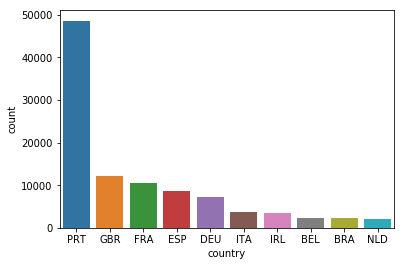

In [13]:
#Origin country of the customers
#Graphic 
country = sns.countplot(x='country',data=raw,order=pd.value_counts(raw['country']).iloc[:10].index)

# Majority of the customers are from Portugal, United Kingdom or France. 

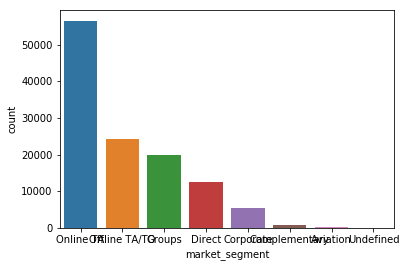

In [14]:
##Market Segment 
#Graphic 
mrkt_seg = sns.countplot(raw['market_segment'],  order = raw['market_segment'].value_counts().index)
plt.show()

# Majority of the reservations are for: TA:  means Travel Agents


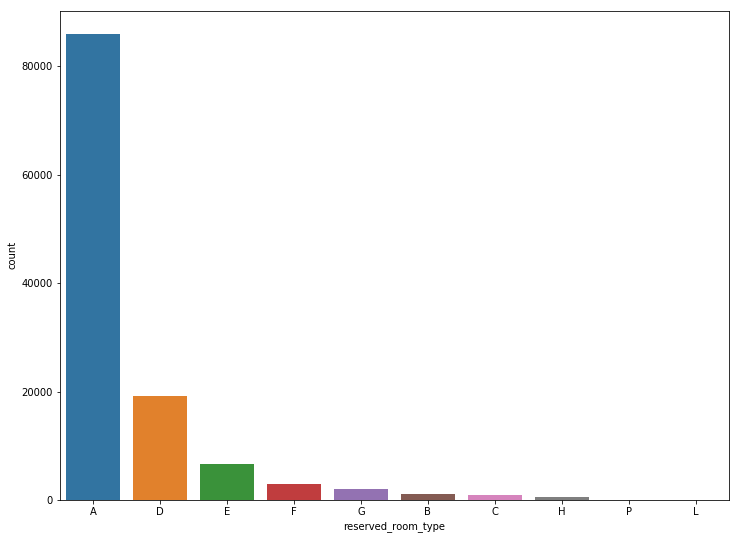

In [15]:
##Reserved Room Type
#Graphic 
plt.figure(figsize=(12 ,9 ))
rsrv_room_type = sns.countplot(raw['reserved_room_type'],  order = raw['reserved_room_type'].value_counts().index)
# Majority of the reservations room type is A



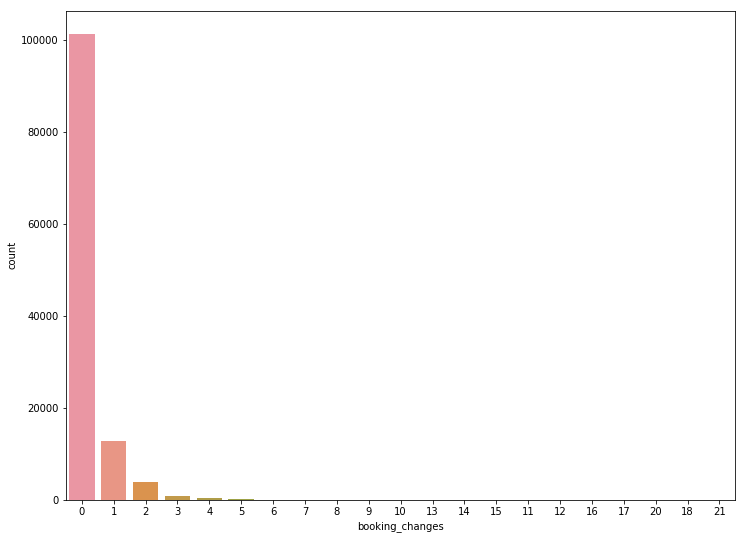

In [16]:
##Booking changes 
#Graphic 
plt.figure(figsize=(12 ,9 ))
book_changes = sns.countplot(raw['booking_changes'],  order = raw['booking_changes'].value_counts().index)
plt.show()

# Majority no changes on the boking


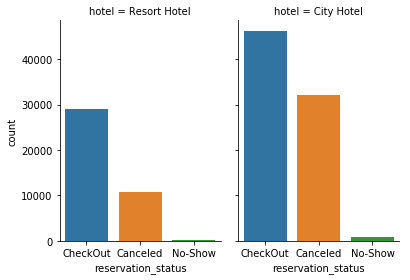

In [17]:
##Reservation Status by type of hotel
#Graphic 
rsrv_sts = sns.catplot(x='reservation_status', col='hotel',
                data=raw, kind='count',
                height=4, aspect=.7);

# Majority did the checkout for each type of hotel

<a name="datacol"></a>
### 4. Data collection, pre-processing and feature engineering

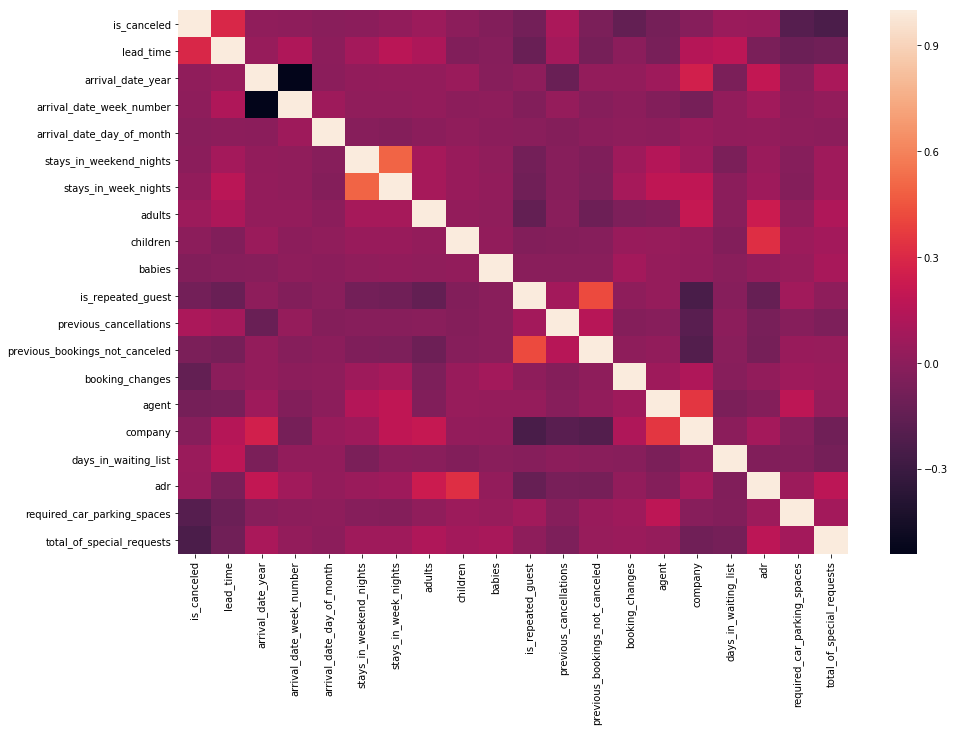

In [18]:
##Correlation matrix 
plt.figure(figsize=(15 ,10 ))
sns.heatmap(raw.corr())

In [19]:
raw.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [20]:
## No high values for the correlation between variables

In [21]:
raw = pd.read_csv('hotel_bookings.csv')
raw=raw.drop(['agent','company','reservation_status_date', 'reservation_status'],axis=1)
raw['country']=raw['country'].replace(np.nan,'PRT')
raw['children']=raw['children'].replace(np.nan,'0')
raw['children']=raw['children'].astype('int')

In [22]:
##convert categorical to numerical variables
raw=pd.get_dummies(raw,prefix=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'])

<a name="predmodel"></a>
### 5. Predictive Modeling and Evaluation (the whole process)

In [23]:
raw.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
#1. Select the features
X=raw.drop('is_canceled',axis=1 )
X.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,27,1,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,737,2015,27,1,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2015,27,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,13,2015,27,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,14,2015,27,1,0,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
#1. Select the Dependent Variable
#dependent variable
y = raw['is_canceled']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [26]:
#Data Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=2)

<a name="modelsel"></a>
### 6. Model Selection

<a name="model1"></a>
### 6.1 Model 1 - RFC

#### MODEL - RFC

In [27]:
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning) #No warnings

LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### PREDICTION 

In [28]:
y_pred = LR.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[20696,  2008],
       [ 4451,  8662]], dtype=int64)

#### EVALUATION

In [30]:
accuracy=accuracy_score(y_test, y_pred)
accuracy 
#0.819

0.8196666387469638

In [31]:
##Model Evaluation 
#Let's see how our model perform
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87     22704
           1       0.81      0.66      0.73     13113

   micro avg       0.82      0.82      0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.82     35817



<a name="model2"></a>
### 6.2 Model 2 - SVM

#### MODEL - SVM

In [32]:
#Model SVM 
clf = svm.SVC(gamma='auto')
#Model Fitting
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)


In [35]:
print('Model1 - SVM score: ') 
clf.score(X_train,y_train)
##The model score is 0.815

Model1 - SVM score: 


0.8153111650892034

#### PREDICTION 

In [36]:
Z_pred = clf.predict(X_test)
Z_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

#### EVALUATION

In [39]:
accuracy=accuracy_score(y_test, Z_pred)
accuracy 
#0.79

0.7911885417539157

In [40]:
##Model Evaluation 
#Let's see how our model perform
print(classification_report(y_test, Z_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     22704
           1       0.86      0.52      0.64     13113

   micro avg       0.79      0.79      0.79     35817
   macro avg       0.81      0.73      0.75     35817
weighted avg       0.80      0.79      0.78     35817



In [42]:
##Model Evaluation 
#Let's see how our model perform
print(classification_report(y_test, Z_pred))
#print(confusion_matrix(y_test, Z_pred))



              precision    recall  f1-score   support

           0       0.77      0.95      0.85     22704
           1       0.86      0.52      0.64     13113

   micro avg       0.79      0.79      0.79     35817
   macro avg       0.81      0.73      0.75     35817
weighted avg       0.80      0.79      0.78     35817



<a name="model3"></a>
### 6.3 Model 3 - Neural Network 

#### MODEL - NEURAL NETWORK

In [44]:
#Model Neural Network
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
#Model Fitting
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [45]:
print('Model3 - Neural Network score: ') 
mlpc.score(X_train,y_train)
##The model score is 0.84

Model3 - Neural Network score: 


0.8436576406255609

#### PREDICTION 

In [46]:
N_pred = mlpc.predict(X_test)
N_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [50]:
#confusion_matrix1 = confusion_matrix1(y_test, N_pred)
#confusion_matrix1

#### EVALUATION

In [51]:
accuracy=accuracy_score(y_test, N_pred)
accuracy 


0.8435379847558422

In [52]:
print('Training score: ')
print(cross_val_score(mlpc, X_train, y_train, cv=3)) 
#0.839

Training score: 
[0.83175993 0.82639911 0.81789137]


In [53]:
#Let's see how our model perform
print(classification_report(y_test, N_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22704
           1       0.78      0.80      0.79     13113

   micro avg       0.84      0.84      0.84     35817
   macro avg       0.83      0.83      0.83     35817
weighted avg       0.84      0.84      0.84     35817



In [55]:
##Model Evaluation 
#Let's see how our model perform
print(classification_report(y_test, N_pred))
#print(confusion_matrix(y_test, N_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22704
           1       0.78      0.80      0.79     13113

   micro avg       0.84      0.84      0.84     35817
   macro avg       0.83      0.83      0.83     35817
weighted avg       0.84      0.84      0.84     35817



<a name="model4"></a>
### 6.4 Model 4 - Gradient Boosting

#### MODEL - Gradient Boosting

In [59]:
#Model GB
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#Model Fitting
clf_gb.fit(X_train, y_train)
pred_gb = clf_gb.predict(X_test)

In [60]:
print('Model4 - Gradient Boosting score: ') 
clf_gb.score(X_train,y_train)
##The model score is 0.83

Model4 - Gradient Boosting score: 


0.833965515178347

#### PREDICTION 

In [61]:
G_pred = clf_gb.predict(X_test)
G_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [63]:
#confusion_matrix = confusion_matrix(y_test, G_pred)
#confusion_matrix

#### EVALUATION

In [64]:
accuracy=accuracy_score(y_test, G_pred)
accuracy 

0.8357763073400899

In [65]:
print('Training score: ')
print(cross_val_score(clf_gb, X_train, y_train, cv=3)) 


Training score: 
[0.83441617 0.83382992 0.83099401]


In [66]:
#Let's see how our model perform
print(classification_report(y_test, G_pred))
#print(confusion_matrix(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     22704
           1       0.82      0.71      0.76     13113

   micro avg       0.84      0.84      0.84     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.84      0.83     35817

